In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving top_1000_imdb_movies.csv to top_1000_imdb_movies (1).csv


In [2]:
data=pd.read_csv("top_10000_imdb_movies.csv")

In [3]:
data.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,836,049",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu...",tt0111161
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,817,468",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron...",tt0468569
2,Inception,(2010),8.8,UA,$292.58M,"2,500,792",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le...",tt1375666
3,Fight Club,(1999),8.8,A,$37.03M,"2,271,737",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf...",tt0137523
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,175,614",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ...",tt0110912


In [ ]:
data.shape

(10000, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    10000 non-null  object 
 1   year          10000 non-null  object 
 2   rating        10000 non-null  float64
 3   certificate   10000 non-null  object 
 4   gross_income  10000 non-null  object 
 5   votes         10000 non-null  object 
 6   runtime       10000 non-null  object 
 7   genre         10000 non-null  object 
 8   description   10000 non-null  object 
 9   directors     10000 non-null  object 
 10  stars         9998 non-null   object 
 11  movie_id      10000 non-null  object 
dtypes: float64(1), object(11)
memory usage: 937.6+ KB


In [ ]:
data['stars'].fillna('Not Available', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    10000 non-null  object 
 1   year          10000 non-null  object 
 2   rating        10000 non-null  float64
 3   certificate   10000 non-null  object 
 4   gross_income  10000 non-null  object 
 5   votes         10000 non-null  object 
 6   runtime       10000 non-null  object 
 7   genre         10000 non-null  object 
 8   description   10000 non-null  object 
 9   directors     10000 non-null  object 
 10  stars         10000 non-null  object 
 11  movie_id      10000 non-null  object 
dtypes: float64(1), object(11)
memory usage: 937.6+ KB


In [ ]:
zero_values = (data =='0').sum()
zero_values

movie_name         0
year               0
rating             0
certificate        0
gross_income    2432
votes           2432
runtime            0
genre              0
description        0
directors          0
stars              0
movie_id           0
dtype: int64

In [ ]:
null_values=(data=='null').sum()
null_values

movie_name      0
year            0
rating          0
certificate     0
gross_income    0
votes           0
runtime         0
genre           0
description     0
directors       0
stars           0
movie_id        0
dtype: int64

In [ ]:
not_rated=(data=='Not Rated').sum()
not_rated

movie_name         0
year               0
rating             0
certificate     2451
gross_income       0
votes              0
runtime            0
genre              0
description        0
directors          0
stars              0
movie_id           0
dtype: int64

In [ ]:
not_rated=(data=='Unrated').sum()
not_rated

movie_name      0
year            0
rating          0
certificate     6
gross_income    0
votes           0
runtime         0
genre           0
description     0
directors       0
stars           0
movie_id        0
dtype: int64

In [ ]:
# as we observe there is nul values in the votes and gross_income , we wiill drop them
#the certificate columns while scrapping for the empty ones we hv given 'not rated' so we will elimate that rows

In [ ]:
df=data.copy()
df

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,836,049",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu...",tt0111161
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,817,468",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron...",tt0468569
2,Inception,(2010),8.8,UA,$292.58M,"2,500,792",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le...",tt1375666
3,Fight Club,(1999),8.8,A,$37.03M,"2,271,737",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf...",tt0137523
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,175,614",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ...",tt0110912
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Sixth Man,(1997),5.6,PG-13,$14.71M,"6,237",107 min,"Comedy, Drama, Fantasy",A college athlete returns from the dead to hel...,Randall Miller,"Stars:Marlon Wayans, Kadeem Hardison, Dav...",tt0120142
9996,Vincere,(2009),6.8,Not Rated,$0.62M,"5,849",128 min,"Biography, Drama, Romance","The story of Mussolini's secret lover, Ida Dal...",Marco Bellocchio,"Stars:Giovanna Mezzogiorno, Filippo Timi,...",tt1156173
9997,Die Feuerzangenbowle,(1944),7.7,Not Rated,0,0,97 min,"Comedy, Family","A successful writer, home-schooled in his yout...",Helmut Weiss,"Stars:Heinz Rühmann, Karin Himboldt, Hild...",tt0036818
9998,Gloria,(1999),5.1,A,$4.16M,"6,148",108 min,"Crime, Drama, Thriller",After serving three years in prison covering f...,Sidney Lumet,"Stars:Sharon Stone, Jean-Luke Figueroa, J...",tt0120683


In [ ]:
df = df[(df['gross_income'] != '0') & (df['votes'] != '0')]
df.reset_index(drop=True, inplace=True)
df.shape

(7568, 12)

In [ ]:
df = df[(df['certificate'] != 'Unrated') & (df['certificate'] != 'Not Rated')]
df.reset_index(drop=True, inplace=True)
df.shape

(6428, 12)

In [ ]:
df.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,836,049",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu...",tt0111161
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,817,468",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron...",tt0468569
2,Inception,(2010),8.8,UA,$292.58M,"2,500,792",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le...",tt1375666
3,Fight Club,(1999),8.8,A,$37.03M,"2,271,737",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf...",tt0137523
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,175,614",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ...",tt0110912


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    6428 non-null   object 
 1   year          6428 non-null   object 
 2   rating        6428 non-null   float64
 3   certificate   6428 non-null   object 
 4   gross_income  6428 non-null   object 
 5   votes         6428 non-null   object 
 6   runtime       6428 non-null   object 
 7   genre         6428 non-null   object 
 8   description   6428 non-null   object 
 9   directors     6428 non-null   object 
 10  stars         6428 non-null   object 
 11  movie_id      6428 non-null   object 
dtypes: float64(1), object(11)
memory usage: 602.8+ KB


In [ ]:
df.duplicated().sum()

274

In [ ]:
df[df.duplicated()]

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id
100,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,836,049",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu...",tt0111161
101,The Dark Knight,(2008),9.0,UA,$534.86M,"2,817,468",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron...",tt0468569
102,Inception,(2010),8.8,UA,$292.58M,"2,500,792",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le...",tt1375666
103,Fight Club,(1999),8.8,A,$37.03M,"2,271,737",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf...",tt0137523
104,Pulp Fiction,(1994),8.9,A,$107.93M,"2,175,614",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ...",tt0110912
...,...,...,...,...,...,...,...,...,...,...,...,...
5725,The Fourth Protocol,(1987),6.5,A,$12.42M,"10,759",119 min,Thriller,John Preston is a British Agent with the task ...,John Mackenzie,"Stars:Michael Caine, Pierce Brosnan, Ned ...",tt0093044
5726,Lola Versus,(2012),5.5,R,$0.25M,"8,945",87 min,Comedy,Dumped by her boyfriend just three weeks befor...,Daryl Wein,"Stars:Greta Gerwig, Zoe Lister-Jones, Ham...",tt1710417
5727,Troll,(1986),4.6,UA,$5.45M,"11,305",82 min,"Comedy, Fantasy, Horror",A wicked troll king in search of a mystical ri...,John Carl Buechler,"Stars:Michael Moriarty, Shelley Hack, Noa...",tt0092115
5728,Jack Goes Boating,(2010),6.3,R,$0.54M,"8,666",91 min,"Drama, Romance",A limo driver's blind date sparks a tale of lo...,Philip Seymour Hoffman,"Stars:Philip Seymour Hoffman, Amy Ryan, J...",tt1278379


In [ ]:
# there are duplicate vlaues in our dataset , we simply drop the rows

In [ ]:
df=df.drop_duplicates()

In [ ]:
df

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,836,049",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu...",tt0111161
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,817,468",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron...",tt0468569
2,Inception,(2010),8.8,UA,$292.58M,"2,500,792",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le...",tt1375666
3,Fight Club,(1999),8.8,A,$37.03M,"2,271,737",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf...",tt0137523
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,175,614",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ...",tt0110912
...,...,...,...,...,...,...,...,...,...,...,...,...
6423,Box of Moonlight,(1996),7.1,R,$0.72M,"5,972",112 min,"Comedy, Drama","An engineer finds his first gray hair, takes 6...",Tom DiCillo,"Stars:John Turturro, Sam Rockwell, Cather...",tt0115738
6424,Breakin',(1984),5.8,U,$38.68M,"7,102",87 min,"Comedy, Drama, Music",A struggling young jazz dancer meets up with t...,Joel Silberg,"Stars:Lucinda Dickey, Adolfo Quinones, Mi...",tt0086998
6425,Extreme Prejudice,(1987),6.6,A,$11.31M,"8,535",105 min,"Action, Crime, Drama",A Texas Ranger and a ruthless narcotics kingpi...,Walter Hill,"Stars:Nick Nolte, Powers Boothe, Michael ...",tt0092997
6426,The Sixth Man,(1997),5.6,PG-13,$14.71M,"6,237",107 min,"Comedy, Drama, Fantasy",A college athlete returns from the dead to hel...,Randall Miller,"Stars:Marlon Wayans, Kadeem Hardison, Dav...",tt0120142


In [ ]:
df[df.duplicated()]

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id


In [ ]:
df.describe()

,rating
count,6154.000000
mean,6.498505
std,0.966377
min,1.300000
25%,5.900000
50%,6.600000
75%,7.200000
max,9.300000


In [ ]:
df.describe(include='all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movie_name,6154,6052,The Jungle Book,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6154,126,(2007),252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,6154.0,NaN,NaN,NaN,6.498505,0.966377,1.3,5.9,6.6,7.2,9.3
certificate,6154,21,R,1626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,6154,3785,$0.01M,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
votes,6154,5994,"8,044",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,6154,140,97 min,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,6154,356,"Comedy, Drama, Romance",370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,6154,6154,"Over the course of several years, two convicts...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directors,6154,2614,Woody Allen,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['stars'] = df['stars'].str.replace('Stars:', '')
df

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,836,049",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ...",tt0111161
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,817,468",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha...",tt0468569
2,Inception,(2010),8.8,UA,$292.58M,"2,500,792",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ...",tt1375666
3,Fight Club,(1999),8.8,A,$37.03M,"2,271,737",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach...",tt0137523
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,175,614",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac...",tt0110912
...,...,...,...,...,...,...,...,...,...,...,...,...
6423,Box of Moonlight,(1996),7.1,R,$0.72M,"5,972",112 min,"Comedy, Drama","An engineer finds his first gray hair, takes 6...",Tom DiCillo,"John Turturro, Sam Rockwell, Catherine Ke...",tt0115738
6424,Breakin',(1984),5.8,U,$38.68M,"7,102",87 min,"Comedy, Drama, Music",A struggling young jazz dancer meets up with t...,Joel Silberg,"Lucinda Dickey, Adolfo Quinones, Michael ...",tt0086998
6425,Extreme Prejudice,(1987),6.6,A,$11.31M,"8,535",105 min,"Action, Crime, Drama",A Texas Ranger and a ruthless narcotics kingpi...,Walter Hill,"Nick Nolte, Powers Boothe, Michael Ironsi...",tt0092997
6426,The Sixth Man,(1997),5.6,PG-13,$14.71M,"6,237",107 min,"Comedy, Drama, Fantasy",A college athlete returns from the dead to hel...,Randall Miller,"Marlon Wayans, Kadeem Hardison, David Pay...",tt0120142


In [ ]:
for i in df.columns:
    print(format(len(df[i].unique())),":  unique values in ",i)



6052 :  unique values in  movie_name
126 :  unique values in  year
76 :  unique values in  rating
21 :  unique values in  certificate
3785 :  unique values in  gross_income
5994 :  unique values in  votes
140 :  unique values in  runtime
356 :  unique values in  genre
6154 :  unique values in  description
2614 :  unique values in  directors
6123 :  unique values in  stars
6154 :  unique values in  movie_id


In [ ]:
for i in df.columns:
    print("the unique values in ",i,'\n\n',df[i].unique(),'\n\n\n=================================')

the unique values in  movie_name 

 ['The Shawshank Redemption' 'The Dark Knight' 'Inception' ... "Breakin'"
 'Extreme Prejudice' 'The Sixth Man'] 


the unique values in  year 

 ['(1994)' '(2008)' '(2010)' '(1999)' '(2001)' '(2003)' '(1972)' '(2012)'
 '(2002)' '(1995)' '(2000)' '(2005)' '(2014)' '(1977)' '(1991)' '(2009)'
 '(1998)' '(2006)' '(1993)' '(1980)' '(1997)' '(1974)' '(2013)' '(1985)'
 '(1990)' '(1983)' '(1975)' '(2004)' '(1992)' '(1981)' '(2007)' '(1984)'
 '(1988)' '(1979)' '(2015)' '(1971)' '(2011)' '(1989)' '(1976)' '(1966)'
 '(1986)' '(1987)' '(I) (2008)' '(2016)' '(1996)' '(1982)' '(I) (2012)'
 '(1957)' '(I) (2013)' '(I) (2011)' '(1968)' '(1960)' '(I) (2015)'
 '(1942)' '(I) (2004)' '(1964)' '(I) (2014)' '(1954)' '(I) (2010)'
 '(1941)' '(1939)' '(1973)' '(I) (2009)' '(I) (2005)' '(I) (2007)'
 '(1958)' '(II) (2014)' '(I) (2006)' '(1978)' '(1959)' '(1967)'
 '(I) (1995)' '(1962)' '(I) (2000)' '(1963)' '(1965)' '(1969)'
 '(I) (1998)' '(1952)' '(II) (2015)' '(I) (1996)' '(I) 

In [ ]:
for i in df.columns:
    print('the value count for the column',i,'\n\n',df[i].value_counts(),'\n\n\n=================================')


the value count for the column movie_name 

 The Jungle Book               3
Hamlet                        3
Carrie                        2
Fantastic Four                2
King Kong                     2
                             ..
Along Came a Spider           1
Killer Joe                    1
Fool's Gold                   1
Deuce Bigalow: Male Gigolo    1
The Sixth Man                 1
Name: movie_name, Length: 6052, dtype: int64 


the value count for the column year 

 (2007)         252
(2006)         246
(2011)         240
(2014)         234
(2013)         232
              ... 
(I) (1987)       1
(II) (2009)      1
(1937)           1
(1948)           1
(II) (1996)      1
Name: year, Length: 126, dtype: int64 


the value count for the column rating 

 6.4    285
6.6    284
6.7    279
6.2    266
7.1    261
      ... 
1.5      1
2.1      1
2.0      1
9.2      1
1.7      1
Name: rating, Length: 76, dtype: int64 


the value count for the column certificate 

 R           1626

### visualization for the numeric features

Text(0.5, 1.0, 'Distribution of rating')

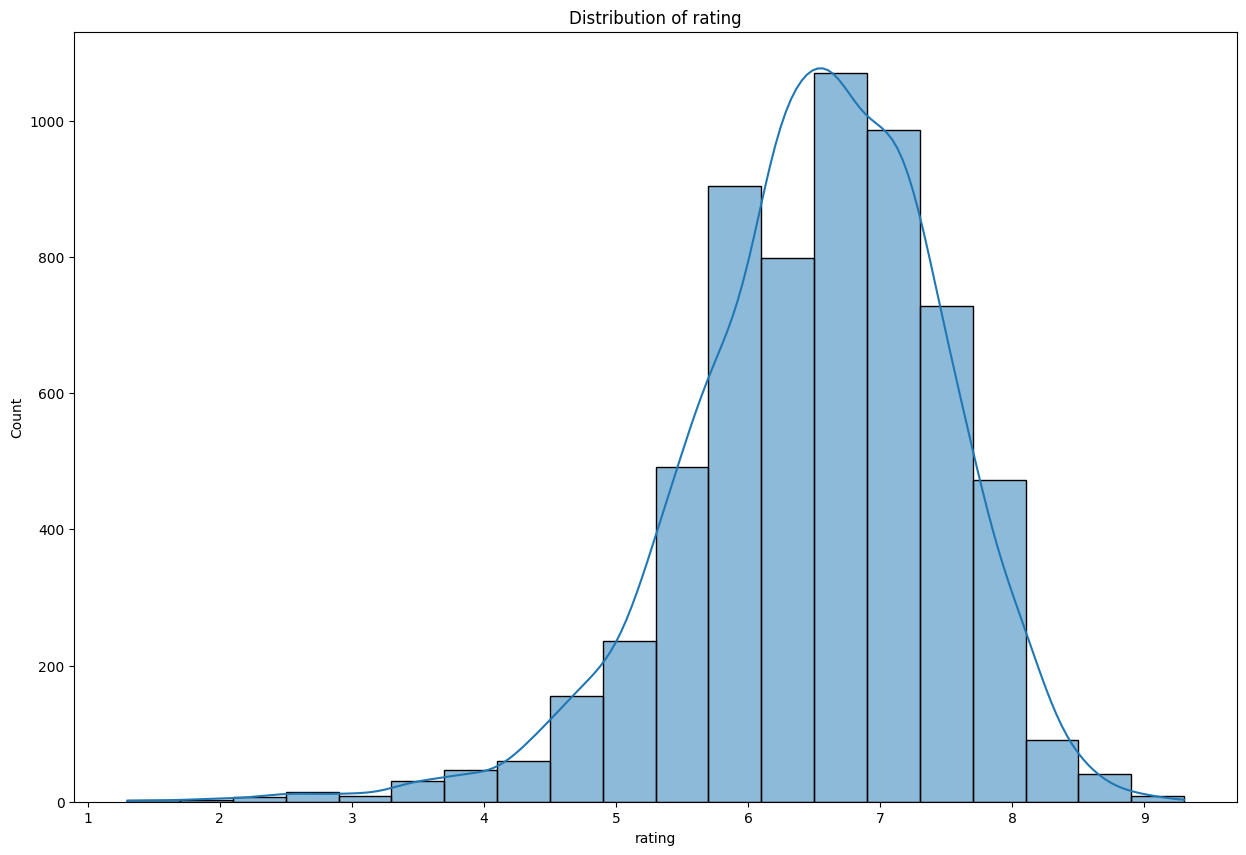

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of rating')


Text(0.5, 1.0, 'Distribution of Gross Income')

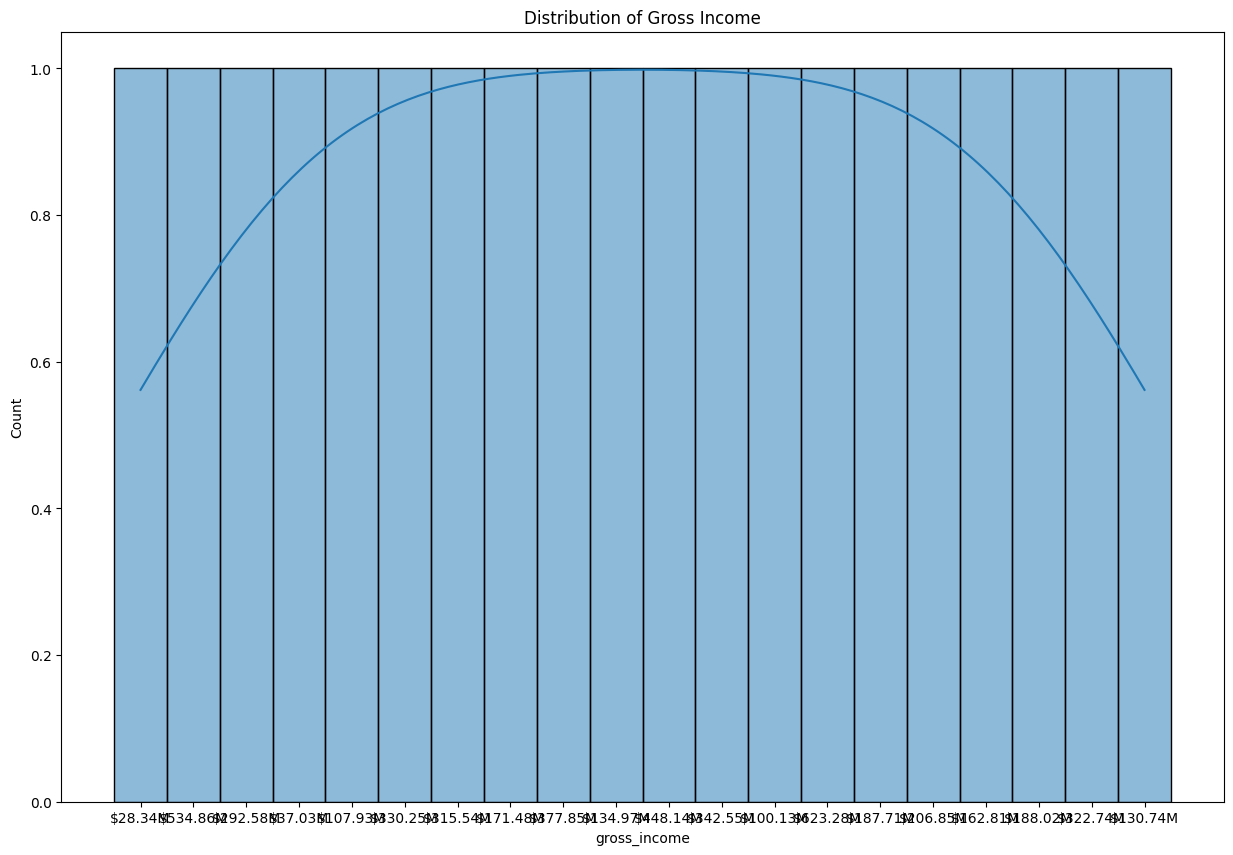

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(df['gross_income'].head(20), bins=20, kde=True)
plt.title('Distribution of Gross Income')


Text(0.5, 1.0, 'Distribution of votes')

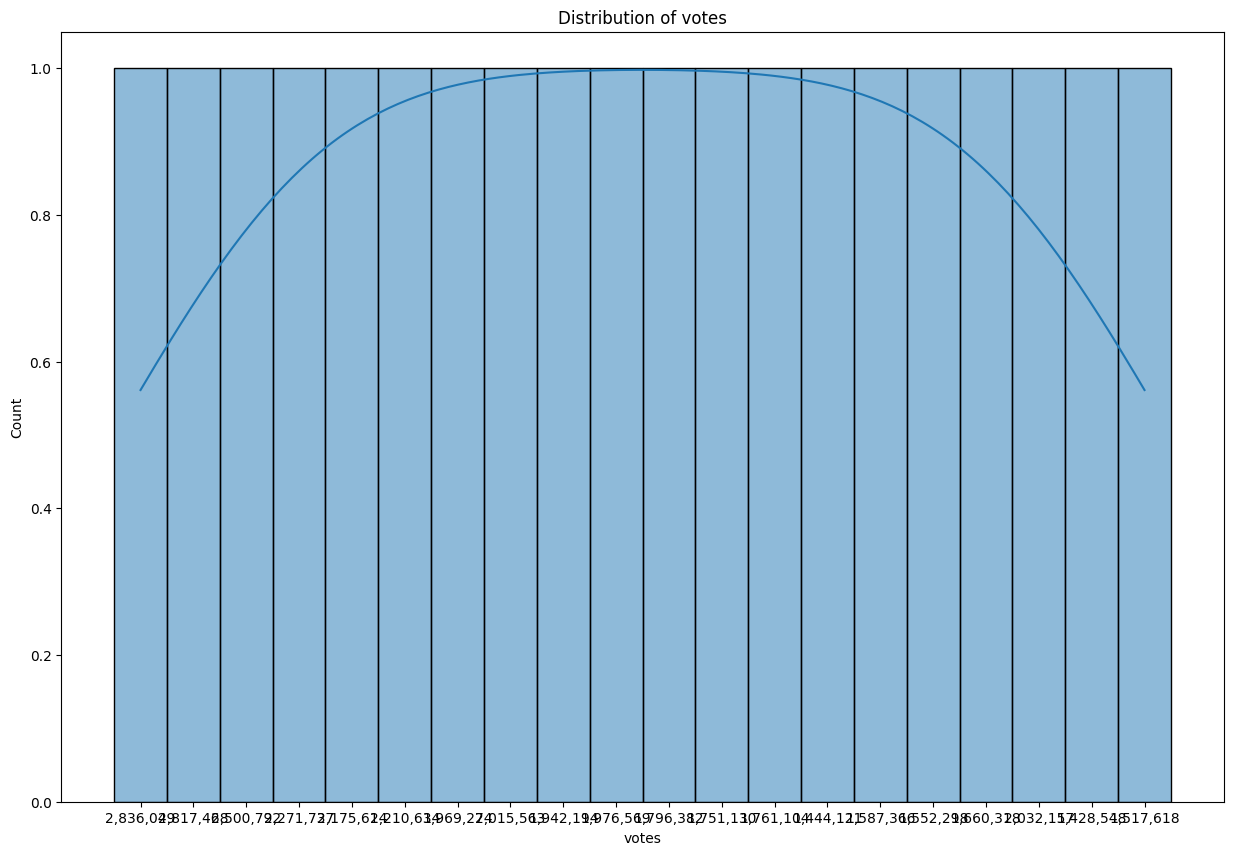

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(df['votes'].head(20), bins=20, kde=True)
plt.title('Distribution of votes')


# visualization for the categorical features

Text(0.5, 1.0, 'Top 20 Genres')

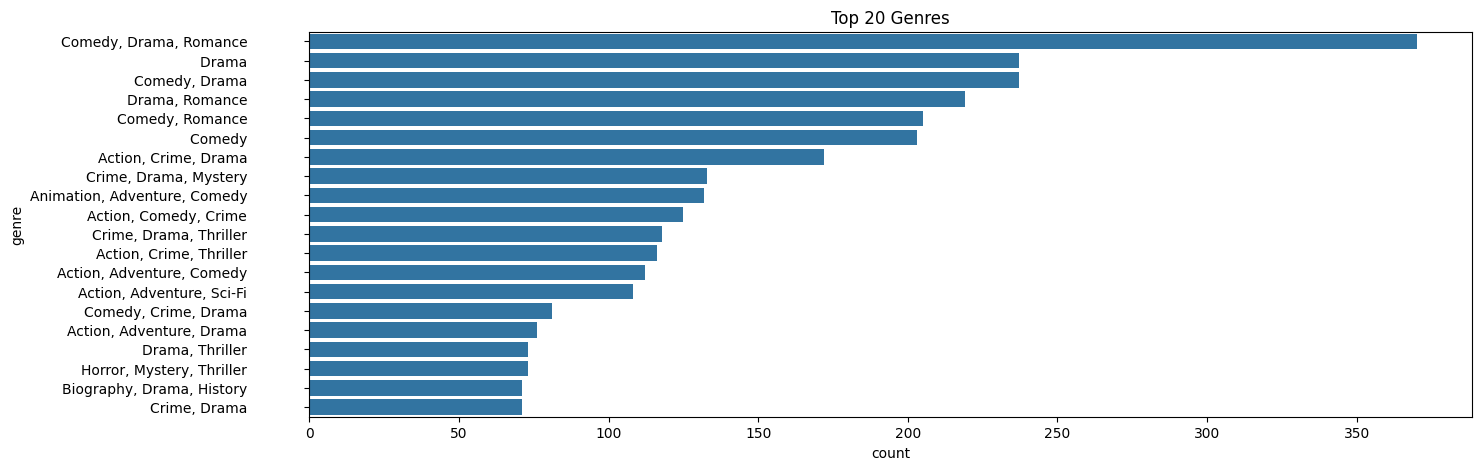

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index[:20])
plt.title('Top 20 Genres')

Text(0.5, 1.0, 'Certificate Distribution')

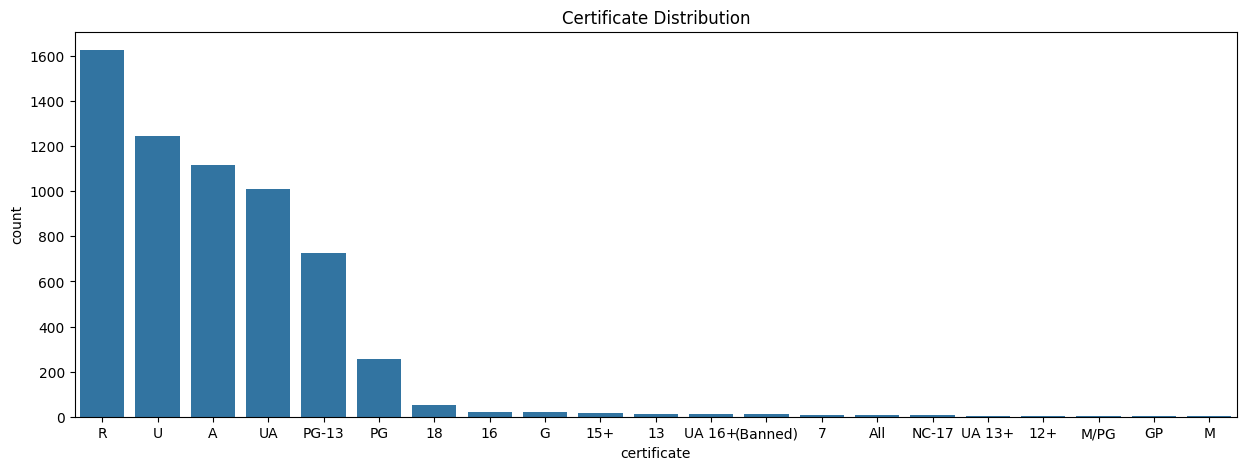

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='certificate', data=df, order=df['certificate'].value_counts().index)
plt.title('Certificate Distribution')

Text(0.5, 1.0, 'Top 20 Release Years')

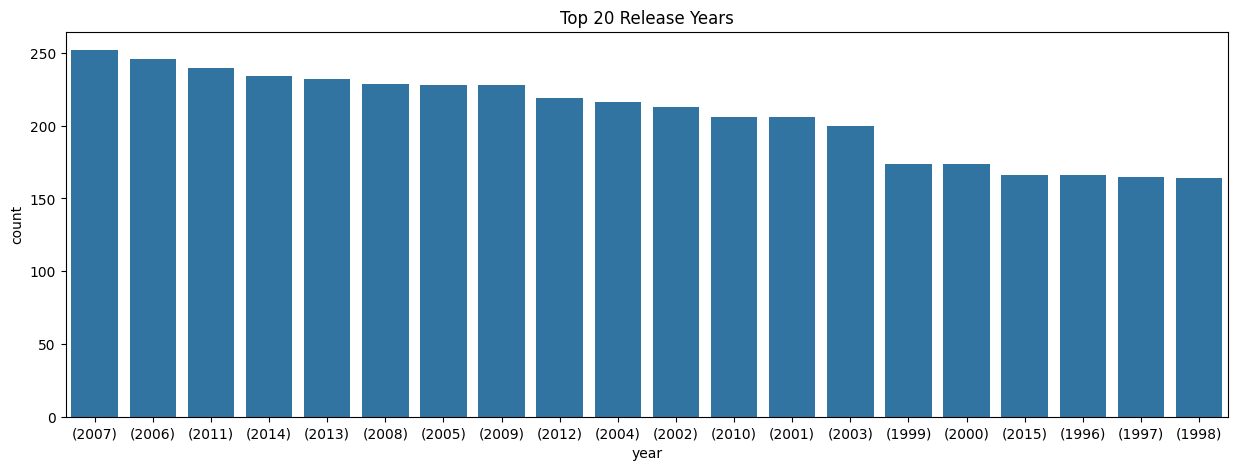

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='year', data=df, order=df['year'].value_counts().index[:20])
plt.title('Top 20 Release Years')

Text(0.5, 1.0, 'Top 10 directors')

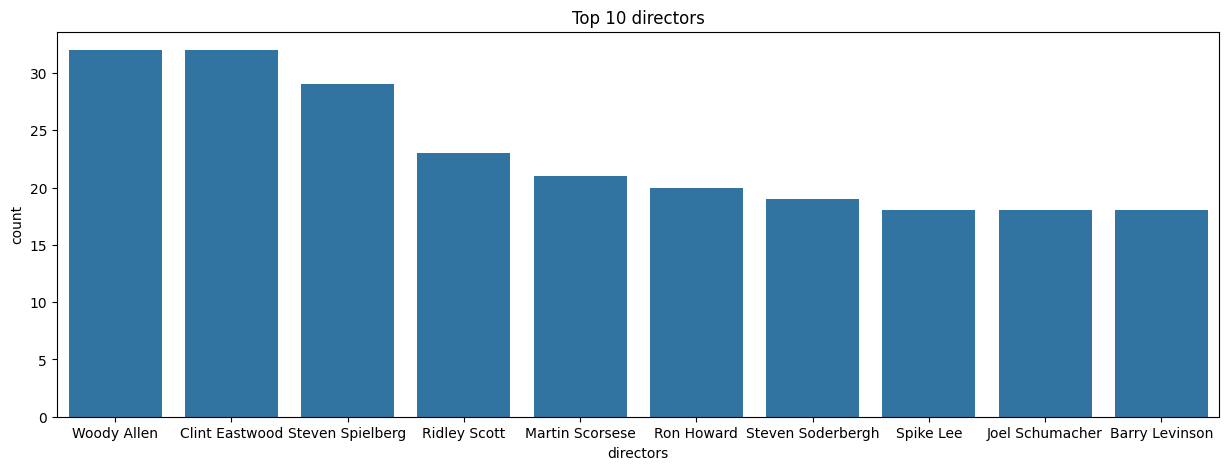

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='directors', data=df, order=df['directors'].value_counts().index[:10])
plt.title('Top 10 directors')

## the top 10 movies with the highest rating

In [ ]:
df.groupby('movie_name')['rating'].mean().sort_values(ascending=False).head(10)

movie_name
The Shawshank Redemption                             9.3
The Godfather                                        9.2
The Lord of the Rings: The Return of the King        9.0
The Godfather Part II                                9.0
The Dark Knight                                      9.0
12 Angry Men                                         9.0
Schindler's List                                     9.0
The Lord of the Rings: The Fellowship of the Ring    8.9
Pulp Fiction                                         8.9
The Lord of the Rings: The Two Towers                8.8
Name: rating, dtype: float64

In [ ]:
df.groupby('genre')['gross_income'].count().sort_values(ascending=False)

genre
Comedy, Drama, Romance                     370
Comedy, Drama                              237
Drama                                      237
Drama, Romance                             219
Comedy, Romance                            205
                                          ... 
Adventure, Sci-Fi, Thriller                  1
Adventure, Thriller                          1
Adventure, War, Western                      1
Adventure, Western                           1
Adventure, Fantasy, Mystery                  1
Name: gross_income, Length: 356, dtype: int64

# top 10 highest genre with the higest gross collection

In [ ]:
df['gross_income'] = pd.to_numeric(df['gross_income'].replace('[\$,M]', '', regex=True), errors='coerce')
genre_gross_income = df.groupby('genre')['gross_income'].sum()

highest_gross_genre = genre_gross_income.sort_values(ascending=False).head(10)
highest_gross_genre


genre
Animation, Adventure, Comedy                16839.32
Action, Adventure, Sci-Fi                   16553.66
Comedy, Drama, Romance                       9157.99
Comedy                                       8339.77
Comedy, Romance                              8262.74
Action, Adventure, Fantasy                   7033.48
Action, Adventure, Comedy                    6417.64
Action, Comedy, Crime                        5305.86
Action, Adventure, Drama                     5080.92
Action, Adventure, Thriller                  5053.52
Name: gross_income, dtype: float64

# top 10 movies with the highest votes

In [ ]:
df['votes'] = pd.to_numeric(df['votes'].replace('[,]', '', regex=True), errors='coerce')
top_votes_movies = df.sort_values(by='votes', ascending=False).head(10)

print(top_votes_movies[['movie_name', 'votes']])


                                           movie_name    votes
0                            The Shawshank Redemption  2836049
1                                     The Dark Knight  2817468
2                                           Inception  2500792
3                                          Fight Club  2271737
5                                        Forrest Gump  2210634
4                                        Pulp Fiction  2175614
17                                       Interstellar  2032157
7                                          The Matrix  2015563
9                                       The Godfather  1976569
6   The Lord of the Rings: The Fellowship of the Ring  1969274


# top 5 certificate movies which collected the highest gross

In [ ]:
df['gross_income'] = pd.to_numeric(df['gross_income'].replace('[\$,M]', '', regex=True), errors='coerce')
certificate_gross_income = df.groupby('certificate')['gross_income'].sum()
top_certificates = certificate_gross_income.sort_values(ascending=False).head(5)
top_certificates


certificate
U        72985.90
UA       71440.33
A        49605.32
R        14310.99
PG-13    14157.37
Name: gross_income, dtype: float64

# top 5 directors with highest gross

In [ ]:
df['gross_income'] = pd.to_numeric(df['gross_income'].replace('[\$,M]', '', regex=True), errors='coerce')
director_gross_income = df.groupby('directors')['gross_income'].sum()
top_directors = director_gross_income.sort_values(ascending=False).head(5)
top_directors


directors
Steven Spielberg    4284.47
Michael Bay         2196.34
Peter Jackson       2134.38
Robert Zemeckis     2035.84
James Cameron       1948.98
Name: gross_income, dtype: float64

In [ ]:
df1=df.copy()

In [ ]:
df1.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,(1994),9.3,A,28.34,2836049,142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ...",tt0111161
1,The Dark Knight,(2008),9.0,UA,534.86,2817468,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha...",tt0468569
2,Inception,(2010),8.8,UA,292.58,2500792,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ...",tt1375666
3,Fight Club,(1999),8.8,A,37.03,2271737,139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach...",tt0137523
4,Pulp Fiction,(1994),8.9,A,107.93,2175614,154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac...",tt0110912


In [ ]:
stars_split = df1['stars'].str.split(',', expand=True)

In [ ]:
stars_split.columns = [f'Star_{i+1}' for i in range(stars_split.shape[1])]

In [ ]:
df1 = pd.concat([df1, stars_split], axis=1)

In [ ]:
df1.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id,Star_1,Star_2,Star_3,Star_4
0,The Shawshank Redemption,(1994),9.3,A,28.34,2836049,142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ...",tt0111161,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Dark Knight,(2008),9.0,UA,534.86,2817468,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha...",tt0468569,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
2,Inception,(2010),8.8,UA,292.58,2500792,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ...",tt1375666,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
3,Fight Club,(1999),8.8,A,37.03,2271737,139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach...",tt0137523,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier
4,Pulp Fiction,(1994),8.9,A,107.93,2175614,154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac...",tt0110912,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis


In [ ]:
df1=df1.drop('stars',axis=1)

In [ ]:
df1

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,movie_id,Star_1,Star_2,Star_3,Star_4
0,The Shawshank Redemption,(1994),9.3,A,28.34,2836049,142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,tt0111161,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Dark Knight,(2008),9.0,UA,534.86,2817468,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,tt0468569,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
2,Inception,(2010),8.8,UA,292.58,2500792,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,tt1375666,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
3,Fight Club,(1999),8.8,A,37.03,2271737,139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,tt0137523,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier
4,Pulp Fiction,(1994),8.9,A,107.93,2175614,154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,tt0110912,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,Box of Moonlight,(1996),7.1,R,0.72,5972,112 min,"Comedy, Drama","An engineer finds his first gray hair, takes 6...",Tom DiCillo,tt0115738,John Turturro,Sam Rockwell,Catherine Keener,Lisa Blount
6424,Breakin',(1984),5.8,U,38.68,7102,87 min,"Comedy, Drama, Music",A struggling young jazz dancer meets up with t...,Joel Silberg,tt0086998,Lucinda Dickey,Adolfo Quinones,Michael Chambers,Ben Lokey
6425,Extreme Prejudice,(1987),6.6,A,11.31,8535,105 min,"Action, Crime, Drama",A Texas Ranger and a ruthless narcotics kingpi...,Walter Hill,tt0092997,Nick Nolte,Powers Boothe,Michael Ironside,Maria Conchita Alonso
6426,The Sixth Man,(1997),5.6,PG-13,14.71,6237,107 min,"Comedy, Drama, Fantasy",A college athlete returns from the dead to hel...,Randall Miller,tt0120142,Marlon Wayans,Kadeem Hardison,David Paymer,Michael Michele


In [ ]:
df1.values[0]

array(['The Shawshank Redemption', '(1994)', 9.3, 'A', 28.34, 2836049,
       '142 min', 'Drama            ',
       'Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.',
       'Frank Darabont', 'tt0111161', '     Tim Robbins',
       ' Morgan Freeman', ' Bob Gunton', ' William Sadler'], dtype=object)

In [ ]:
df2=df.copy()
df2.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,(1994),9.3,A,28.34,2836049,142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ...",tt0111161
1,The Dark Knight,(2008),9.0,UA,534.86,2817468,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha...",tt0468569
2,Inception,(2010),8.8,UA,292.58,2500792,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ...",tt1375666
3,Fight Club,(1999),8.8,A,37.03,2271737,139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach...",tt0137523
4,Pulp Fiction,(1994),8.9,A,107.93,2175614,154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac...",tt0110912


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6154 entries, 0 to 6427
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    6154 non-null   object 
 1   year          6154 non-null   object 
 2   rating        6154 non-null   float64
 3   certificate   6154 non-null   object 
 4   gross_income  6154 non-null   float64
 5   votes         6154 non-null   int64  
 6   runtime       6154 non-null   object 
 7   genre         6154 non-null   object 
 8   description   6154 non-null   object 
 9   directors     6154 non-null   object 
 10  stars         6154 non-null   object 
 11  movie_id      6154 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 625.0+ KB


In [ ]:
df2=df2.drop(['year','rating','gross_income','votes','runtime'],axis=1)

In [ ]:
df2.head()

,movie_name,certificate,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,A,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ...",tt0111161
1,The Dark Knight,UA,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha...",tt0468569
2,Inception,UA,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ...",tt1375666
3,Fight Club,A,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach...",tt0137523
4,Pulp Fiction,A,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac...",tt0110912


In [ ]:
df2['description']=df2['description'].apply(lambda x:x.split())

In [ ]:
df2.head()

,movie_name,certificate,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,A,Drama,"[Over, the, course, of, several, years,, two, ...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ...",tt0111161
1,The Dark Knight,UA,"Action, Crime, Drama","[When, the, menace, known, as, the, Joker, wre...",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha...",tt0468569
2,Inception,UA,"Action, Adventure, Sci-Fi","[A, thief, who, steals, corporate, secrets, th...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ...",tt1375666
3,Fight Club,A,Drama,"[An, insomniac, office, worker, and, a, devil-...",David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach...",tt0137523
4,Pulp Fiction,A,"Crime, Drama","[The, lives, of, two, mob, hitmen,, a, boxer,,...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac...",tt0110912


In [ ]:
df2['directors'] = df2['directors'].apply(lambda x: x.replace(" ", "").split(','))
df2['stars'] = df2['stars'].apply(lambda x: x.replace(" ", "").split(','))
df2['genre'] = df2['genre'].apply(lambda x: x.replace(" ", "").split(','))
df2['certificate'] = df2['certificate'].apply(lambda x: x.replace(" ", "").split(','))
df2.head()


,movie_name,certificate,genre,description,directors,stars,movie_id
0,The Shawshank Redemption,[A],[Drama],"[Over, the, course, of, several, years,, two, ...",[FrankDarabont],"[TimRobbins, MorganFreeman, BobGunton, William...",tt0111161
1,The Dark Knight,[UA],"[Action, Crime, Drama]","[When, the, menace, known, as, the, Joker, wre...",[ChristopherNolan],"[ChristianBale, HeathLedger, AaronEckhart, Mic...",tt0468569
2,Inception,[UA],"[Action, Adventure, Sci-Fi]","[A, thief, who, steals, corporate, secrets, th...",[ChristopherNolan],"[LeonardoDiCaprio, JosephGordon-Levitt, Elliot...",tt1375666
3,Fight Club,[A],[Drama],"[An, insomniac, office, worker, and, a, devil-...",[DavidFincher],"[BradPitt, EdwardNorton, MeatLoaf, ZachGrenier]",tt0137523
4,Pulp Fiction,[A],"[Crime, Drama]","[The, lives, of, two, mob, hitmen,, a, boxer,,...",[QuentinTarantino],"[JohnTravolta, UmaThurman, SamuelL.Jackson, Br...",tt0110912


# creating a  new columns df2[''overall]. which combines the values from the certificate,genre,description,directors,stars

In [ ]:
df2['overall']=df2['description'] + df2['genre'] + df2['certificate'] + df2['stars'] + df2['directors']
df2.head()

,movie_name,certificate,genre,description,directors,stars,movie_id,overall
0,The Shawshank Redemption,[A],[Drama],"[Over, the, course, of, several, years,, two, ...",[FrankDarabont],"[TimRobbins, MorganFreeman, BobGunton, William...",tt0111161,"[Over, the, course, of, several, years,, two, ..."
1,The Dark Knight,[UA],"[Action, Crime, Drama]","[When, the, menace, known, as, the, Joker, wre...",[ChristopherNolan],"[ChristianBale, HeathLedger, AaronEckhart, Mic...",tt0468569,"[When, the, menace, known, as, the, Joker, wre..."
2,Inception,[UA],"[Action, Adventure, Sci-Fi]","[A, thief, who, steals, corporate, secrets, th...",[ChristopherNolan],"[LeonardoDiCaprio, JosephGordon-Levitt, Elliot...",tt1375666,"[A, thief, who, steals, corporate, secrets, th..."
3,Fight Club,[A],[Drama],"[An, insomniac, office, worker, and, a, devil-...",[DavidFincher],"[BradPitt, EdwardNorton, MeatLoaf, ZachGrenier]",tt0137523,"[An, insomniac, office, worker, and, a, devil-..."
4,Pulp Fiction,[A],"[Crime, Drama]","[The, lives, of, two, mob, hitmen,, a, boxer,,...",[QuentinTarantino],"[JohnTravolta, UmaThurman, SamuelL.Jackson, Br...",tt0110912,"[The, lives, of, two, mob, hitmen,, a, boxer,,..."


create a new data frame which contain only the movie_name and the new column 'overall'


In [ ]:
df3=df2[['movie_name','overall','movie_id']]
df3

,movie_name,overall,movie_id
0,The Shawshank Redemption,"[Over, the, course, of, several, years,, two, ...",tt0111161
1,The Dark Knight,"[When, the, menace, known, as, the, Joker, wre...",tt0468569
2,Inception,"[A, thief, who, steals, corporate, secrets, th...",tt1375666
3,Fight Club,"[An, insomniac, office, worker, and, a, devil-...",tt0137523
4,Pulp Fiction,"[The, lives, of, two, mob, hitmen,, a, boxer,,...",tt0110912
...,...,...,...
6423,Box of Moonlight,"[An, engineer, finds, his, first, gray, hair,,...",tt0115738
6424,Breakin',"[A, struggling, young, jazz, dancer, meets, up...",tt0086998
6425,Extreme Prejudice,"[A, Texas, Ranger, and, a, ruthless, narcotics...",tt0092997
6426,The Sixth Man,"[A, college, athlete, returns, from, the, dead...",tt0120142


In [ ]:
df3=df3.head(3500)

In [ ]:
#converting the 'overall' list into string
df3["overall"] = df3["overall"].apply(lambda x: ' '.join(x))

KeyError: 'overall'

In [ ]:
df3.head()

In [ ]:
#convert 'overall' into lower
df3["overalls"] = df3["overall"].apply(lambda x: x.lower())

KeyError: 'overall'

In [ ]:
df3.head()

In [ ]:
df3 = df3.drop('overall', axis=1)

In [ ]:
df3.head(30)

,movie_name,movie_id,overalls
0,The Shawshank Redemption,tt0111161,"over the course of several years, two convicts..."
1,The Dark Knight,tt0468569,when the menace known as the joker wreaks havo...
2,Inception,tt1375666,a thief who steals corporate secrets through t...
3,Fight Club,tt0137523,an insomniac office worker and a devil-may-car...
4,Pulp Fiction,tt0110912,"the lives of two mob hitmen, a boxer, a gangst..."
5,Forrest Gump,tt0109830,the history of the united states from the 1950...
6,The Lord of the Rings: The Fellowship of the Ring,tt0120737,a meek hobbit from the shire and eight compani...
7,The Matrix,tt0133093,when a beautiful stranger leads computer hacke...
8,The Lord of the Rings: The Return of the King,tt0167260,gandalf and aragorn lead the world of men agai...
9,The Godfather,tt0068646,"don vito corleone, head of a mafia family, dec..."


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_name  3500 non-null   object
 1   movie_id    3500 non-null   object
 2   overalls    3500 non-null   object
dtypes: object(3)
memory usage: 109.4+ KB


converting the repeated words into a specific name if loved and loving and lover etc they consider as love

In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
ps = PorterStemmer()

In [ ]:
df3["overalls"] = df3["overalls"].apply(lambda text: " ".join([ps.stem(word) for word in nltk.word_tokenize(text)]))


In [ ]:
df3['overalls'][0]

'over the cours of sever year , two convict form a friendship , seek consol and , eventu , redempt through basic compass . drama a timrobbin morganfreeman bobgunton williamsadl frankdarabont'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv= CountVectorizer(stop_words='english', max_features=3000)     #the 7000 most frequent words in your dataset

In [ ]:
cv.fit_transform(df3["overalls"]).toarray().shape

(3500, 3000)

In [ ]:
vectors=cv.fit_transform(df3['overalls']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
cosine_similarity(vectors)

array([[1.        , 0.05661385, 0.        , ..., 0.        , 0.05555556,
        0.05661385],
       [0.05661385, 1.        , 0.17334381, ..., 0.        , 0.1132277 ,
        0.19230769],
       [0.        , 0.17334381, 1.        , ..., 0.08333333, 0.10206207,
        0.20801257],
       ...,
       [0.        , 0.        , 0.08333333, ..., 1.        , 0.        ,
        0.04622502],
       [0.05555556, 0.1132277 , 0.10206207, ..., 0.        , 1.        ,
        0.15097027],
       [0.05661385, 0.19230769, 0.20801257, ..., 0.04622502, 0.15097027,
        1.        ]])

In [ ]:
cosine_similarity(vectors).shape

(3500, 3500)

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
sorted(list (enumerate(similarity[0])), reverse=True ,key=lambda x: x[1])[1:6]

[(1931, 0.26490647141300877),
 (601, 0.25197631533948484),
 (820, 0.2314550249431379),
 (2623, 0.22645540682891918),
 (2885, 0.223606797749979)]

In [ ]:
def recommend(movie):
  movie_index= df3[df3["movie_name"]== movie].index[0]
  distances= similarity[movie_index]
  movies_list = sorted(list (enumerate(distances)), reverse=True ,key=lambda x: x[1])[1:6]

  for i in movies_list:
    print(df3.iloc[i[0]].movie_name)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
recommend('The Dark Knight')

Batman Begins
The Dark Knight Rises
No Way Out
Daredevil
Harry Brown


In [ ]:
#The dark knight ,batman begins , the dark knight rises , are directed by chirstopher nolan
# the batman : the killing joke is directed by sam liu
# harry brown is directed by daniel barber
# dabangg2 is directd by arbaaz khan
# ** The commonality between the movies listed is that they all belong to the genre of superhero, action, or crime films.

In [ ]:
recommend('The Shawshank Redemption')


Stuck in Love
Atonement
Nuovo Cinema Paradiso
2046
Short Cuts


In [ ]:
#the commonality between this movies listes is that they all belong to the genre drama,romace,thriller

In [ ]:
import pickle
pickle.dump(recommend, open("movies.pkl", "wb"))



In [ ]:
#import with dict
pickle.dump(df3.to_dict(),open("movie_dict.pkl","wb"))

In [ ]:
pickle.dump(similarity, open("similarity.pkl", "wb"))

In [ ]:
#Another Method

In [ ]:
data = df3.copy()

In [ ]:
data

,movie_name,overalls
0,The Shawshank Redemption,"over the cours of sever year , two convict for..."
1,The Dark Knight,when the menac known as the joker wreak havoc ...
2,Inception,a thief who steal corpor secret through the us...
3,Fight Club,an insomniac offic worker and a devil-may-car ...
4,Pulp Fiction,"the live of two mob hitmen , a boxer , a gangs..."
...,...,...
6423,Box of Moonlight,"an engin find hi first gray hair , take 6 day ..."
6424,Breakin',a struggl young jazz dancer meet up with two b...
6425,Extreme Prejudice,a texa ranger and a ruthless narcot kingpin - ...
6426,The Sixth Man,a colleg athlet return from the dead to help h...


In [ ]:
data.head(1)['overalls']

0    over the cours of sever year , two convict for...
Name: overalls, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfv = TfidfVectorizer(min_df=3,max_features=None,
                     strip_accents='unicode',analyzer= 'word',token_pattern=r'\w{1,}',
                     ngram_range=(1,3),
                     stop_words='english')

In [ ]:
tfv_matrix = tfv.fit_transform(data['overalls'])

In [ ]:
tfv_matrix.shape

(6154, 12618)

In [ ]:
tfv_matrix

<6154x12618 sparse matrix of type '<class 'numpy.float64'>'
	with 177503 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [ ]:
sig[0]

array([0.76162744, 0.76159424, 0.76159416, ..., 0.76159427, 0.76159425,
       0.76159503])

In [ ]:
indices = pd.Series(data.index,index = data['movie_name']).drop_duplicates()

In [ ]:
indices

movie_name
The Shawshank Redemption       0
The Dark Knight                1
Inception                      2
Fight Club                     3
Pulp Fiction                   4
                            ... 
Box of Moonlight            6423
Breakin'                    6424
Extreme Prejudice           6425
The Sixth Man               6426
Gloria                      6427
Length: 6154, dtype: int64

In [ ]:
def Giv_rec(title,sig = sig):
    idx = indices[title]

    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores,key = lambda x:x[1],reverse = True)

    sig_scores = sig_scores[1:11]

    movie_indices = [i[0] for i in sig_scores]

    return data['movie_name'].iloc[movie_indices]


In [ ]:
Giv_rec('The Shawshank Redemption',sig)

6048                     Levity
3771                    Godsend
4512              The Duellists
4900    Italiensk for begyndere
2985                 Short Cuts
1964             New Year's Eve
1055                Deep Impact
3482            Le violon rouge
701                   Atonement
4170               Dolphin Tale
Name: movie_name, dtype: object